**直接上传权重模型进行预测 ，在预测部分**

# 准备工作


In [ ]:
import os

In [ ]:
!pip install kaggle


In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # 设置权限


mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d danielshanbalico/dog-emotion


Dataset URL: https://www.kaggle.com/datasets/danielshanbalico/dog-emotion
License(s): CC0-1.0
 96% 149M/155M [00:04<00:00, 41.6MB/s]
100% 155M/155M [00:04<00:00, 35.9MB/s]


In [ ]:
!unzip dog-emotion.zip -d /content/dog_emotion_dataset



Archive:  dog-emotion.zip
  inflating: /content/dog_emotion_dataset/Dog Emotion/angry/09dUVMcjCDfOtbeYDQg5Fvu3GPHWJg811.jpg  
  inflating: /content/dog_emotion_dataset/Dog Emotion/angry/0AvKtuzA7LfxnKaO0bey9mQMLnxXad73.jpg  
  inflating: /content/dog_emotion_dataset/Dog Emotion/angry/0C5yo7GxMy8lztxNZvSdfEx2gSPRTR701.jpg  
  inflating: /content/dog_emotion_dataset/Dog Emotion/angry/0C9jEgFQHsh36W5U2u5CA98lB7C5eX806.jpg  
  inflating: /content/dog_emotion_dataset/Dog Emotion/angry/0RXraPIKC00Dz1qkuMbj8XbuR80g5Z893.jpg  
  inflating: /content/dog_emotion_dataset/Dog Emotion/angry/0TSpHUDh1xIQthYrtH8E1UZQ72rcTZ68.jpg  
  inflating: /content/dog_emotion_dataset/Dog Emotion/angry/0aNyXBrmNA7XdefwHvgO2n1rnpqQAp885.jpg  
  inflating: /content/dog_emotion_dataset/Dog Emotion/angry/0dWl0dRT9Pc98fjFSvGOXlGlE0B4E6267.jpg  
  inflating: /content/dog_emotion_dataset/Dog Emotion/angry/0da4j6Ehkb6Ml0YBRiWmsBU2wEMoXP409.jpg  
  inflating: /content/dog_emotion_dataset/Dog Emotion/angry/0jgI6KwR6IGvq9CA

In [ ]:
dataset_path = "/content/dog_emotion_dataset"
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        print(os.path.join(root, file))


/content/dog_emotion_dataset/Dog Emotion/labels.csv
/content/dog_emotion_dataset/Dog Emotion/angry/MYhjva9ofpE9akppVAGZFgP8sV2y8C499.jpg
/content/dog_emotion_dataset/Dog Emotion/angry/5Dpz615tGJN4c1l2abT73RdqbziwqC41.jpg
/content/dog_emotion_dataset/Dog Emotion/angry/qG1JvHgQ6gGRvD6T8sLSTsXGJKRSFf21.jpg
/content/dog_emotion_dataset/Dog Emotion/angry/Md2DJENHBn3yvjPhQnM60yn8sh1qX9851.jpg
/content/dog_emotion_dataset/Dog Emotion/angry/1GFNdPDe8wXTXZPBboGHYLJtAYolJq648.jpg
/content/dog_emotion_dataset/Dog Emotion/angry/x7I3GghzHWjgznIGS0ecotHckMZbVv119.jpg
/content/dog_emotion_dataset/Dog Emotion/angry/ie7uKI6ss3qB80z7tNc9xpvY3wVXqh95.jpg
/content/dog_emotion_dataset/Dog Emotion/angry/F3YV6rxKkpdrp5AkWUHXinKA26iSo2248.jpg
/content/dog_emotion_dataset/Dog Emotion/angry/pOLowTI4qOC0d7kjKI2cMJBob6NCkW969.jpg
/content/dog_emotion_dataset/Dog Emotion/angry/oyb3C7PunyghFfpcS6sLfMSfu3nKHV328.jpg
/content/dog_emotion_dataset/Dog Emotion/angry/sXWRx8tt4wpteMSGAwVWKSH85t2Lzc778.jpg
/content/dog_emo

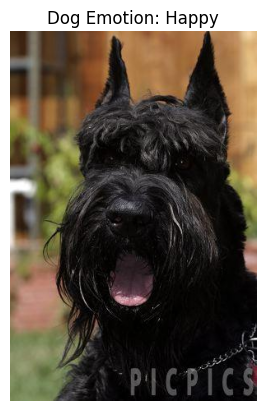

In [ ]:
import matplotlib.pyplot as plt
import cv2

# 读取一张图片
img_path = "/content/dog_emotion_dataset/Dog Emotion/happy/04FMq3exmYnLxQ85XzYhS0a9Mrb5Ic420.jpg"  # 请替换为数据集中实际的图片路径
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # OpenCV 读取的图像是 BGR 需要转换成 RGB

# 显示图片
plt.imshow(img)
plt.axis("off")
plt.title("Dog Emotion: Happy")
plt.show()


In [ ]:
import pandas as pd

# 读取 CSV 文件
csv_path = "/content/dog_emotion_dataset/Dog Emotion/labels.csv"
df = pd.read_csv(csv_path)

# 显示前几行
df.head()


,Unnamed: 0,filename,label
0,0,yubL63eiiPmoRru8Z2K2yRo0NnGDCL683.jpg,sad
1,1,c1tVljKiLM9q2zTBuQGWpxmzBuSeBR437.jpg,sad
2,2,RbzNOvY5GIAl3PSjIRTKpEkQs1NByq575.jpg,angry
3,3,gKujaBuWYezz0yWK9ydTFVi6LbQtXe397.jpg,angry
4,4,U0hJ2ryOu1IOuYpc01O7RngPYa8Xvz795.jpg,relaxed


# 建模

In [ ]:
import os
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


In [ ]:
# 设置图像变换
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # 统一图片大小
    transforms.ToTensor(),  # 转换为张量
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # 归一化
])

# 设定数据集路径
data_dir = "/content/dog_emotion_dataset/Dog Emotion"

# 加载训练集和验证集
train_dataset = datasets.ImageFolder(root=data_dir, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# 获取类别名称
class_names = train_dataset.classes
print(f"类别名称: {class_names}")  # ['angry', 'happy', 'relaxed', 'sad']


类别名称: ['angry', 'happy', 'relaxed', 'sad']


In [ ]:
import numpy as np


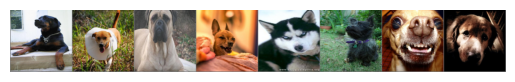

relaxed angry relaxed angry angry relaxed angry sad


In [ ]:
def imshow(img):
    img = img / 2 + 0.5  # 反归一化
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis("off")
    plt.show()

# 取一批数据
dataiter = iter(train_loader)
images, labels = next(dataiter)

# 显示图片
imshow(torchvision.utils.make_grid(images[:8]))
print(" ".join(class_names[labels[j]] for j in range(8)))


In [ ]:
import torch.nn as nn
import torch.optim as optim
from torchvision import models

# 加载预训练的 ResNet18
model = models.resnet18(pretrained=True)

# 修改最后一层以匹配分类数（4类）
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(class_names))

# 设备选择（GPU 或 CPU）
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 188MB/s]


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from tqdm import tqdm  # 进度条
import os

# 训练参数
num_epochs = 30
best_acc = 0.0  # 记录最高精度
save_path = "/content/resnet_dog_emotion.pth"  # 模型保存路径

# 训练循环
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    # 使用 tqdm 显示训练进度
    progress_bar = tqdm(enumerate(train_loader), total=len(train_loader), desc=f"Epoch {epoch+1}/{num_epochs}")

    for batch_idx, (images, labels) in progress_bar:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # 更新进度条
        progress_bar.set_postfix(loss=loss.item(), accuracy=correct / total)

    epoch_loss = running_loss / len(train_loader)
    epoch_acc = correct / total

    print(f"Epoch [{epoch+1}/{num_epochs}] - Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}")

    # 保存当前 epoch 的模型
    torch.save(model.state_dict(), save_path)
    print(f"模型已保存到: {save_path}")

    # 如果当前精度比之前最佳精度更高，则更新最优模型
    if epoch_acc > best_acc:
        best_acc = epoch_acc
        best_model_path = "/content/best_resnet_dog_emotion.pth"
        torch.save(model.state_dict(), best_model_path)
        print(f"当前最佳模型已保存到: {best_model_path}")

print("训练完成！🎉")


Epoch 1/30: 100%|██████████| 125/125 [00:33<00:00,  3.72it/s, accuracy=0.644, loss=0.77]


Epoch [1/30] - Loss: 0.8813, Accuracy: 0.6445
模型已保存到: /content/resnet_dog_emotion.pth
当前最佳模型已保存到: /content/best_resnet_dog_emotion.pth


Epoch 2/30: 100%|██████████| 125/125 [00:27<00:00,  4.56it/s, accuracy=0.77, loss=0.444]


Epoch [2/30] - Loss: 0.5857, Accuracy: 0.7702
模型已保存到: /content/resnet_dog_emotion.pth
当前最佳模型已保存到: /content/best_resnet_dog_emotion.pth


Epoch 3/30: 100%|██████████| 125/125 [00:28<00:00,  4.42it/s, accuracy=0.808, loss=0.344]


Epoch [3/30] - Loss: 0.4996, Accuracy: 0.8080
模型已保存到: /content/resnet_dog_emotion.pth
当前最佳模型已保存到: /content/best_resnet_dog_emotion.pth


Epoch 4/30: 100%|██████████| 125/125 [00:27<00:00,  4.50it/s, accuracy=0.855, loss=0.365]


Epoch [4/30] - Loss: 0.3887, Accuracy: 0.8545
模型已保存到: /content/resnet_dog_emotion.pth
当前最佳模型已保存到: /content/best_resnet_dog_emotion.pth


Epoch 5/30: 100%|██████████| 125/125 [00:27<00:00,  4.54it/s, accuracy=0.89, loss=0.31]


Epoch [5/30] - Loss: 0.2900, Accuracy: 0.8905
模型已保存到: /content/resnet_dog_emotion.pth
当前最佳模型已保存到: /content/best_resnet_dog_emotion.pth


Epoch 6/30: 100%|██████████| 125/125 [00:27<00:00,  4.56it/s, accuracy=0.91, loss=0.385]


Epoch [6/30] - Loss: 0.2404, Accuracy: 0.9105
模型已保存到: /content/resnet_dog_emotion.pth
当前最佳模型已保存到: /content/best_resnet_dog_emotion.pth


Epoch 7/30: 100%|██████████| 125/125 [00:28<00:00,  4.41it/s, accuracy=0.934, loss=0.0864]


Epoch [7/30] - Loss: 0.1859, Accuracy: 0.9337
模型已保存到: /content/resnet_dog_emotion.pth
当前最佳模型已保存到: /content/best_resnet_dog_emotion.pth


Epoch 8/30: 100%|██████████| 125/125 [00:27<00:00,  4.49it/s, accuracy=0.943, loss=0.174]


Epoch [8/30] - Loss: 0.1652, Accuracy: 0.9427
模型已保存到: /content/resnet_dog_emotion.pth
当前最佳模型已保存到: /content/best_resnet_dog_emotion.pth


Epoch 9/30: 100%|██████████| 125/125 [00:27<00:00,  4.52it/s, accuracy=0.952, loss=0.38]


Epoch [9/30] - Loss: 0.1398, Accuracy: 0.9517
模型已保存到: /content/resnet_dog_emotion.pth
当前最佳模型已保存到: /content/best_resnet_dog_emotion.pth


Epoch 10/30: 100%|██████████| 125/125 [00:27<00:00,  4.48it/s, accuracy=0.96, loss=0.0952]


Epoch [10/30] - Loss: 0.1189, Accuracy: 0.9600
模型已保存到: /content/resnet_dog_emotion.pth
当前最佳模型已保存到: /content/best_resnet_dog_emotion.pth


Epoch 11/30: 100%|██████████| 125/125 [00:28<00:00,  4.46it/s, accuracy=0.969, loss=0.0541]


Epoch [11/30] - Loss: 0.0937, Accuracy: 0.9692
模型已保存到: /content/resnet_dog_emotion.pth
当前最佳模型已保存到: /content/best_resnet_dog_emotion.pth


Epoch 12/30: 100%|██████████| 125/125 [00:27<00:00,  4.51it/s, accuracy=0.98, loss=0.148]


Epoch [12/30] - Loss: 0.0617, Accuracy: 0.9795
模型已保存到: /content/resnet_dog_emotion.pth
当前最佳模型已保存到: /content/best_resnet_dog_emotion.pth


Epoch 13/30: 100%|██████████| 125/125 [00:27<00:00,  4.53it/s, accuracy=0.979, loss=0.193]


Epoch [13/30] - Loss: 0.0686, Accuracy: 0.9792
模型已保存到: /content/resnet_dog_emotion.pth


Epoch 14/30: 100%|██████████| 125/125 [00:27<00:00,  4.46it/s, accuracy=0.967, loss=0.0497]


Epoch [14/30] - Loss: 0.0913, Accuracy: 0.9670
模型已保存到: /content/resnet_dog_emotion.pth


Epoch 15/30: 100%|██████████| 125/125 [00:27<00:00,  4.56it/s, accuracy=0.977, loss=0.13]


Epoch [15/30] - Loss: 0.0760, Accuracy: 0.9772
模型已保存到: /content/resnet_dog_emotion.pth


Epoch 16/30: 100%|██████████| 125/125 [00:28<00:00,  4.45it/s, accuracy=0.974, loss=0.196]


Epoch [16/30] - Loss: 0.0718, Accuracy: 0.9738
模型已保存到: /content/resnet_dog_emotion.pth


Epoch 17/30: 100%|██████████| 125/125 [00:27<00:00,  4.46it/s, accuracy=0.965, loss=0.062]


Epoch [17/30] - Loss: 0.1037, Accuracy: 0.9645
模型已保存到: /content/resnet_dog_emotion.pth


Epoch 18/30: 100%|██████████| 125/125 [00:27<00:00,  4.53it/s, accuracy=0.961, loss=0.0657]


Epoch [18/30] - Loss: 0.1088, Accuracy: 0.9607
模型已保存到: /content/resnet_dog_emotion.pth


Epoch 19/30: 100%|██████████| 125/125 [00:27<00:00,  4.54it/s, accuracy=0.984, loss=0.0494]


Epoch [19/30] - Loss: 0.0511, Accuracy: 0.9840
模型已保存到: /content/resnet_dog_emotion.pth
当前最佳模型已保存到: /content/best_resnet_dog_emotion.pth


Epoch 20/30: 100%|██████████| 125/125 [00:27<00:00,  4.50it/s, accuracy=0.98, loss=0.0095]


Epoch [20/30] - Loss: 0.0585, Accuracy: 0.9798
模型已保存到: /content/resnet_dog_emotion.pth


Epoch 21/30: 100%|██████████| 125/125 [00:27<00:00,  4.51it/s, accuracy=0.989, loss=0.0195]


Epoch [21/30] - Loss: 0.0364, Accuracy: 0.9888
模型已保存到: /content/resnet_dog_emotion.pth
当前最佳模型已保存到: /content/best_resnet_dog_emotion.pth


Epoch 22/30: 100%|██████████| 125/125 [00:27<00:00,  4.55it/s, accuracy=0.984, loss=0.0588]


Epoch [22/30] - Loss: 0.0503, Accuracy: 0.9840
模型已保存到: /content/resnet_dog_emotion.pth


Epoch 23/30: 100%|██████████| 125/125 [00:27<00:00,  4.53it/s, accuracy=0.991, loss=0.0117]


Epoch [23/30] - Loss: 0.0305, Accuracy: 0.9910
模型已保存到: /content/resnet_dog_emotion.pth
当前最佳模型已保存到: /content/best_resnet_dog_emotion.pth


Epoch 24/30: 100%|██████████| 125/125 [00:28<00:00,  4.45it/s, accuracy=0.984, loss=0.262]


Epoch [24/30] - Loss: 0.0451, Accuracy: 0.9840
模型已保存到: /content/resnet_dog_emotion.pth


Epoch 25/30: 100%|██████████| 125/125 [00:28<00:00,  4.45it/s, accuracy=0.969, loss=0.281]


Epoch [25/30] - Loss: 0.0882, Accuracy: 0.9690
模型已保存到: /content/resnet_dog_emotion.pth


Epoch 26/30: 100%|██████████| 125/125 [00:27<00:00,  4.54it/s, accuracy=0.978, loss=0.0472]


Epoch [26/30] - Loss: 0.0648, Accuracy: 0.9780
模型已保存到: /content/resnet_dog_emotion.pth


Epoch 27/30: 100%|██████████| 125/125 [00:27<00:00,  4.47it/s, accuracy=0.987, loss=0.00397]


Epoch [27/30] - Loss: 0.0436, Accuracy: 0.9865
模型已保存到: /content/resnet_dog_emotion.pth


Epoch 28/30: 100%|██████████| 125/125 [00:27<00:00,  4.54it/s, accuracy=0.994, loss=0.0291]


Epoch [28/30] - Loss: 0.0209, Accuracy: 0.9935
模型已保存到: /content/resnet_dog_emotion.pth
当前最佳模型已保存到: /content/best_resnet_dog_emotion.pth


Epoch 29/30: 100%|██████████| 125/125 [00:27<00:00,  4.53it/s, accuracy=0.983, loss=0.103]


Epoch [29/30] - Loss: 0.0476, Accuracy: 0.9828
模型已保存到: /content/resnet_dog_emotion.pth


Epoch 30/30: 100%|██████████| 125/125 [00:28<00:00,  4.46it/s, accuracy=0.984, loss=0.00179]

Epoch [30/30] - Loss: 0.0511, Accuracy: 0.9840
模型已保存到: /content/resnet_dog_emotion.pth
训练完成！🎉


# 预测

In [ ]:
import os

In [ ]:
import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image

# 设备选择
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 定义类别（与你的训练数据类别一致）
class_names = ["angry", "happy", "relaxed", "sad"]  # 需与训练时一致

# 加载 ResNet18 模型
model = models.resnet18(pretrained=False)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(class_names))  # 确保分类数匹配

# 加载训练好的权重
model_path = "/content/resnet_dog_emotion_30epoch.pth"  # 你的模型路径
model.load_state_dict(torch.load(model_path, map_location=device))
model = model.to(device)
model.eval()  # 设为评估模式
print("✅ 模型加载成功！")


✅ 模型加载成功！


<ipython-input-5-df0dd09de90e>:19: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=device))


In [ ]:
# 预处理转换
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # 统一尺寸
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# 读取新图片
image_path = "/content/a3.jpg"  # 替换成你的测试图片
image = Image.open(image_path).convert("RGB")

# 预处理
image_tensor = transform(image).unsqueeze(0).to(device)  # 添加 batch 维度


🐶 预测情绪: angry (1.00)


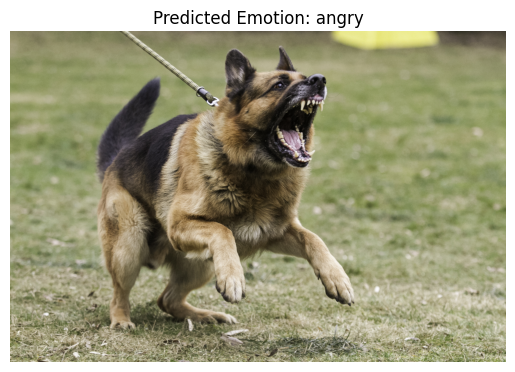

In [ ]:
import torch.nn.functional as F

# 预测
with torch.no_grad():
    outputs = model(image_tensor)
    probabilities = F.softmax(outputs, dim=1)
    predicted_class = torch.argmax(probabilities).item()

# 显示结果
print(f"🐶 预测情绪: {class_names[predicted_class]} ({probabilities[0][predicted_class]:.2f})")

# 显示图片
import matplotlib.pyplot as plt
plt.imshow(image)
plt.axis("off")
plt.title(f"Predicted Emotion: {class_names[predicted_class]}")
plt.show()
